In [1]:
import pandas as pd
import numpy as np
import re
from numpy import median
from datetime import datetime, timedelta
import time
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
sns.set()
%matplotlib inline
pd.set_option('display.max_columns', None)
import plotly.express as px
import squarify as sq
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as tkr
from fim import arules
from operator import attrgetter
import matplotlib.colors as mcolors
warnings.filterwarnings("ignore")




#import libraries for the interaction dashboard.
from jupyter_dash import JupyterDash
from dash import html, dcc
import plotly as pl
import plotly.express as px
from dash.dependencies import Input, Output
import plotly.io as pio
pio.renderers.default='notebook'
import folium
from folium import plugins
import json
import plotly.graph_objs as go
import plotly.io as pio




#Use fivethirtyeight style
plt.style.use('fivethirtyeight')


#Cancel any style and reset matplotlib styles
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
df_credit_card = pd.read_csv('BankChurners.csv', low_memory = False)

In [3]:
df_credit_card.insert(2, "age_group", df_credit_card.apply(lambda x: "Young" if x["Customer_Age"] < 30 else ("Middle-aged" if x["Customer_Age"] < 60 else "Senior"), axis=1))

In [4]:
df_credit_card

,CLIENTNUM,Attrition_Flag,age_group,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,Middle-aged,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,Middle-aged,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,Middle-aged,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,Middle-aged,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,Middle-aged,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,Middle-aged,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,Middle-aged,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,Middle-aged,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,Middle-aged,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [5]:
df_credit_card.shape

(10127, 24)

In [6]:
df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   age_group                                                                                                                           10127 non-null  object 
 3   Customer_Age                                                                     

In [7]:
df_credit_card.select_dtypes(include = 'object').columns

Index(['Attrition_Flag', 'age_group', 'Gender', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category'],
      dtype='object')

In [8]:
df_credit_card.select_dtypes(include = 'int64').columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct'],
      dtype='object')

In [9]:
df_credit_card.select_dtypes(include = 'float64').columns

Index(['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [10]:
df_credit_card.rename(columns={'Income_Category': 'Income_Category_K'}, inplace=True)

In [11]:
df_credit_card['Income_Category_K'][0]

'$60K - $80K'

In [12]:
df_credit_card['Income_Category_K'] = df_credit_card['Income_Category_K'].replace(to_replace=r'K', value='', regex=True)
df_credit_card['Income_Category_K'] = df_credit_card['Income_Category_K'].replace(to_replace=r'\$', value='', regex=True)

df_credit_card['Income_Category_K']

0             60 - 80
1        Less than 40
2            80 - 120
3        Less than 40
4             60 - 80
             ...     
10122         40 - 60
10123         40 - 60
10124    Less than 40
10125         40 - 60
10126    Less than 40
Name: Income_Category_K, Length: 10127, dtype: object

In [13]:
df_credit_card.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'age_group', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category_K', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [14]:
df_credit_card['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [15]:
df_credit_card['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [16]:
df_credit_card['Income_Category_K'].unique()

array(['60 - 80', 'Less than 40', '80 - 120', '40 - 60', '120 +',
       'Unknown'], dtype=object)

In [17]:
df_credit_card['Gender'].unique()

array(['M', 'F'], dtype=object)

In [18]:
df_credit_card['age_group'].unique()

array(['Middle-aged', 'Senior', 'Young'], dtype=object)

In [19]:
df_credit_card['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [20]:
#whenever it finds NaNs it fills them with the word 'unknown' .



df_credit_card["Education_Level"] = df_credit_card["Education_Level"].fillna("Unknown")
df_credit_card["Marital_Status"] = df_credit_card["Marital_Status"].fillna("Unknown")

In [21]:
df_credit_card.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
age_group                                                                                                                             0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                  

In [22]:
df_credit_card.isnull().values.any()

False

In [23]:
#Converting the data type of the category variables from object to category.


category_columns = df_credit_card.select_dtypes(include="object").columns.tolist()

df_credit_card[category_columns] = df_credit_card[category_columns].astype("category")

In [24]:
#Removing the spaces from column names, and standardizing the column names to lower case.


df_credit_card.columns = [i.replace(" ", "_").lower() for i in df_credit_card.columns]

In [25]:
df_credit_card.drop('clientnum', axis = 1, inplace = True)

In [26]:
df_credit_card['credit_limit'] = df_credit_card['credit_limit'].astype('float64')

In [27]:
#Transform function of pandas is a data manipulation tool used to apply a certain transformation 
#(such as a statistical aggregation) to a group of values in a given DataFrame. 
#It is useful for achieving certain tasks that are too complex to be done with groupby



df_credit_card['percentage'] =( 100 * df_credit_card['credit_limit'])/(df_credit_card.groupby('card_category')['credit_limit'].transform('sum'))

In [28]:
#df_credit_card['percentage'] = df_credit_card.groupby(['card_category'])['credit_limit'].transform(lambda x: x/x.sum())

# the higher credit limit  is in the 80-120K income category.

In [29]:
df_income = df_credit_card.groupby('income_category_k')['credit_limit'].mean().reset_index()

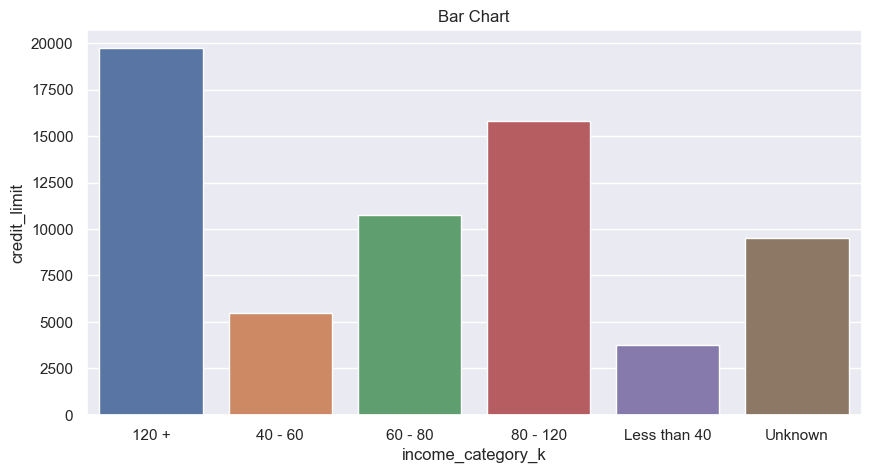

In [30]:
# Create the figure with a larger size
plt.figure(figsize=(10,5))

# Create the bar chart
sns.barplot(x='income_category_k', y='credit_limit', data=df_income)

# Add a title
plt.title("Bar Chart")

# Set the size of the plot
plt.gcf().set_size_inches(10,5)


# Show the chart
plt.show()


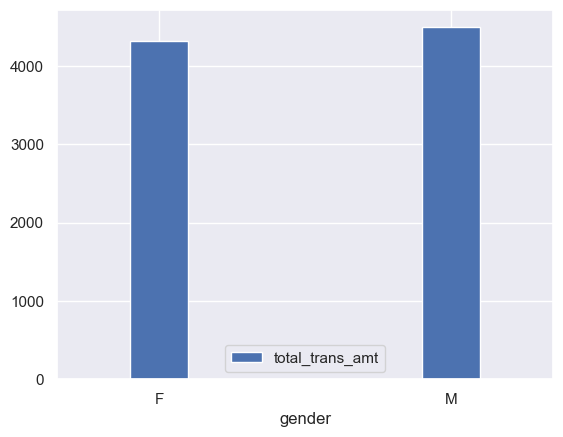

In [31]:
df_credit_card.groupby('gender')['total_trans_amt'].mean().reset_index().plot.bar(x='gender', y='total_trans_amt', color='b', width=0.2, rot = 0)
None

# # Males are using the credit card and spending more than females.

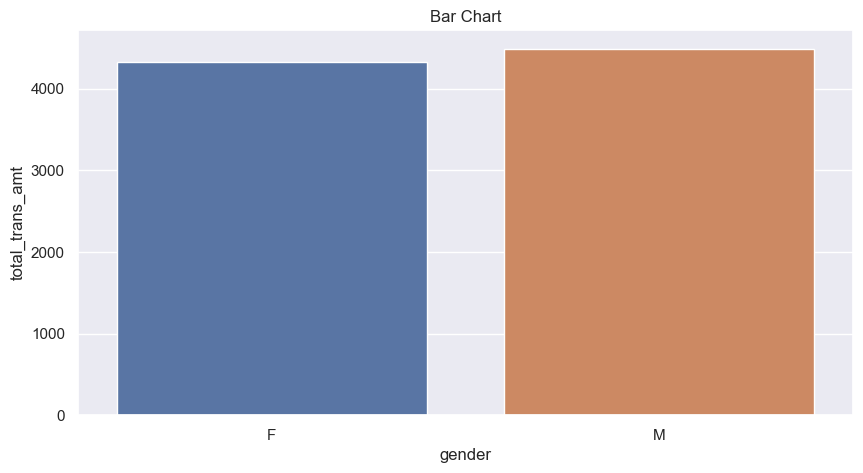

In [32]:
df_gender = df_credit_card.groupby('gender')['total_trans_amt'].mean().reset_index()


# Create the figure with a larger size
plt.figure(figsize=(10,5))

# Create the bar chart
sns.barplot(x='gender', y='total_trans_amt', data=df_gender)

# Add a title
plt.title("Bar Chart")

# Set the size of the plot
#plt.gcf().set_size_inches(10,5)


# Show the chart
plt.show()


# the single ones  make the most transactions rather than the married or the divorced ones.

In [33]:
df_marital = df_credit_card.groupby('marital_status')['total_trans_amt'].mean().reset_index()

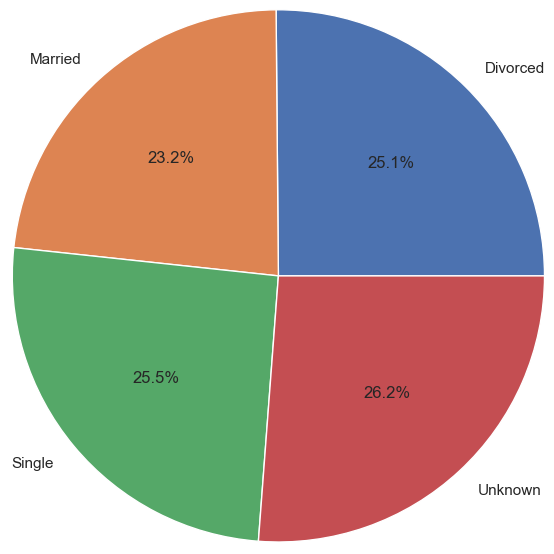

In [34]:
# Create the donut chart
plt.pie(df_marital['total_trans_amt'], labels=df_marital['marital_status'], autopct='%1.1f%%', radius = 1.8)
sns.set_context("poster")
plt.show()

# the middle-aged are using the card more than anyone else in the bank.

In [35]:
df_aged = df_credit_card.groupby('age_group')['total_trans_amt'].mean().reset_index()

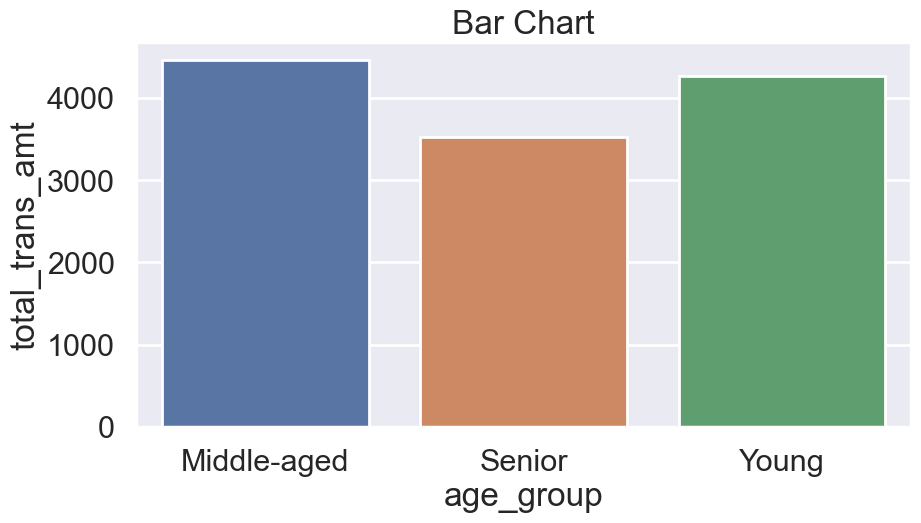

In [36]:
# Create the figure with a larger size
plt.figure(figsize=(10,5))

# Create the bar chart
sns.barplot(x='age_group', y='total_trans_amt', data=df_aged)

# Add a title
plt.title("Bar Chart")

# Set the size of the plot
#plt.gcf().set_size_inches(10,5)


# Show the chart
plt.show()

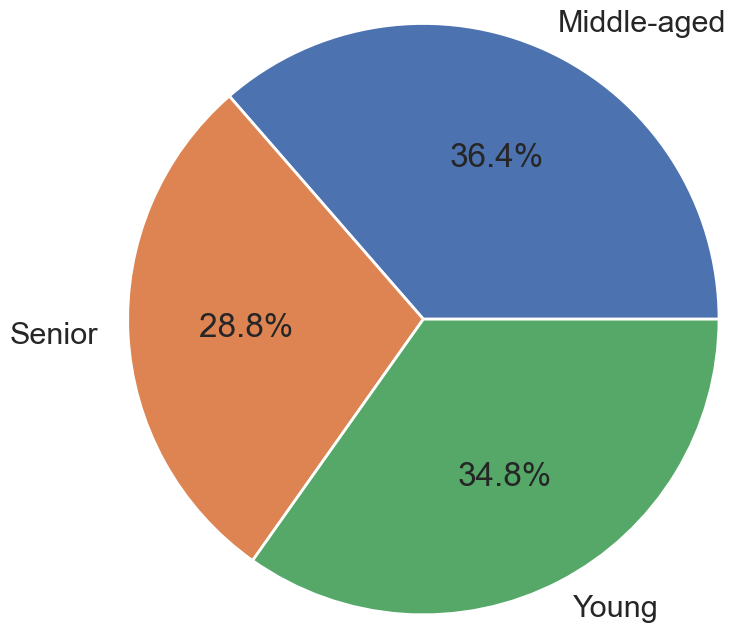

In [37]:
plt.pie(df_aged['total_trans_amt'], labels=df_aged['age_group'], autopct='%1.1f%%', radius = 2)
sns.set_context("poster")
plt.show()

# the customers that are married have the highest credit limit which is a blue card category.

In [38]:
card_segm = df_credit_card.groupby('card_category')['credit_limit'].mean().round(2).reset_index()

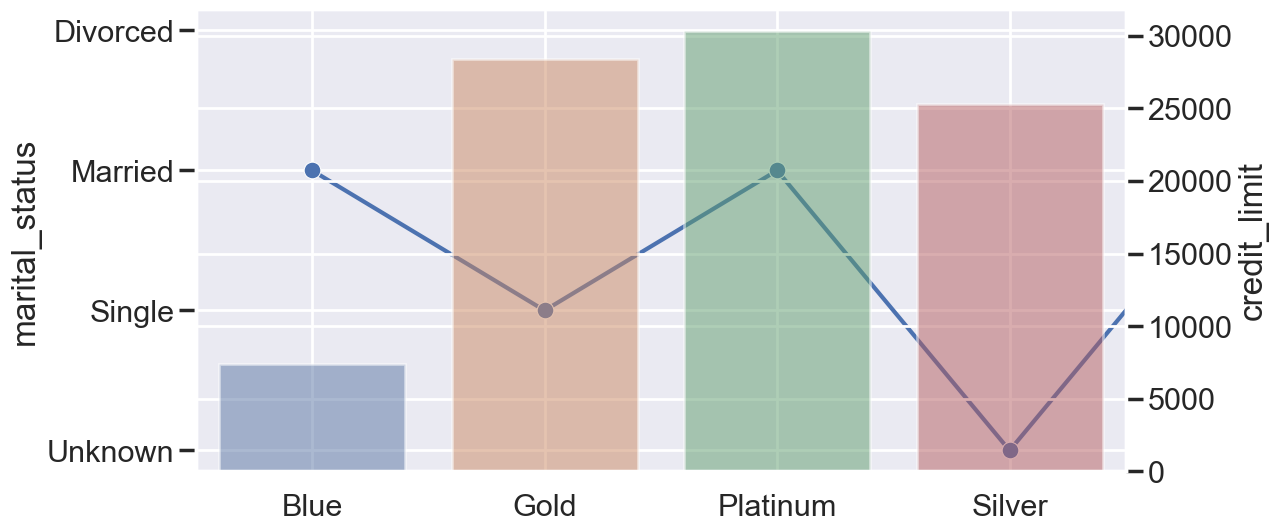

In [39]:



ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = df_credit_card['marital_status'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()


sns.barplot(data = card_segm, x='card_category', y='credit_limit', alpha=0.5, ax=ax2)
None

# the uneducated are the ones who have the biggest avg open to buy , so they don't spend to much money on their credit cards

In [40]:
# average open to buy is the amount that has been left available to buy at the credit card .
#average open to buy = credit limit of the credit card - total amount of transactions being spent at the credit.

In [41]:
df_educational = df_credit_card.groupby('education_level')['avg_open_to_buy'].mean().reset_index()

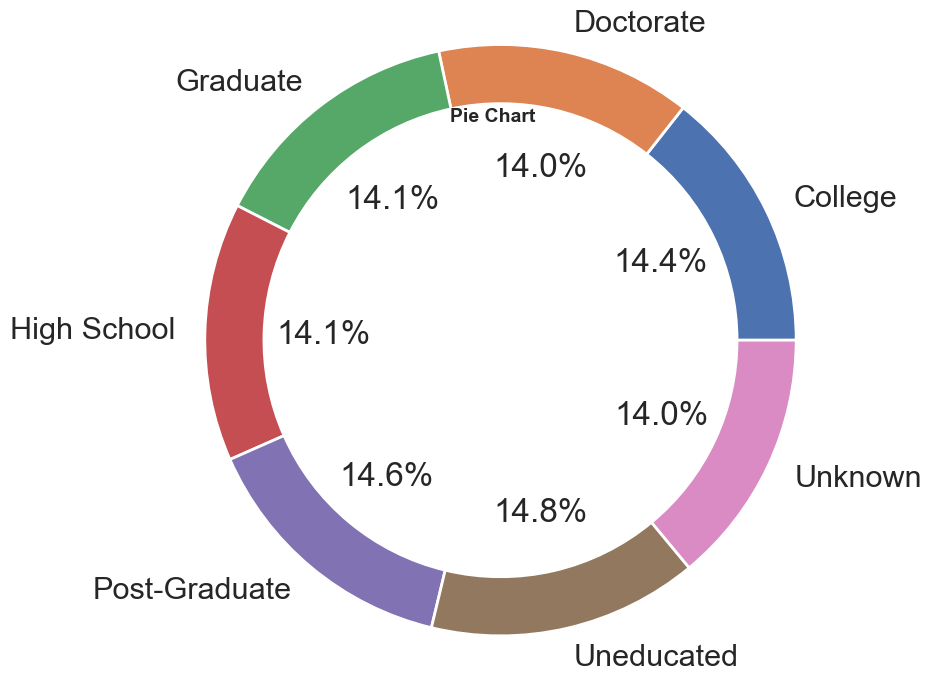

In [42]:
# Create the figure and axes
fig, ax = plt.subplots()

# Create the donut chart
ax.pie(df_educational['avg_open_to_buy'], labels=df_educational['education_level'], radius=2, autopct='%1.1f%%', wedgeprops=dict(width=0.4))

# Draw a circle in the center
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set the title
plt.suptitle("Pie Chart", fontsize=14, fontweight='bold')

# Show the chart
plt.show()

In [43]:
df_educational_credit = df_credit_card.groupby('education_level')['credit_limit'].mean().reset_index()

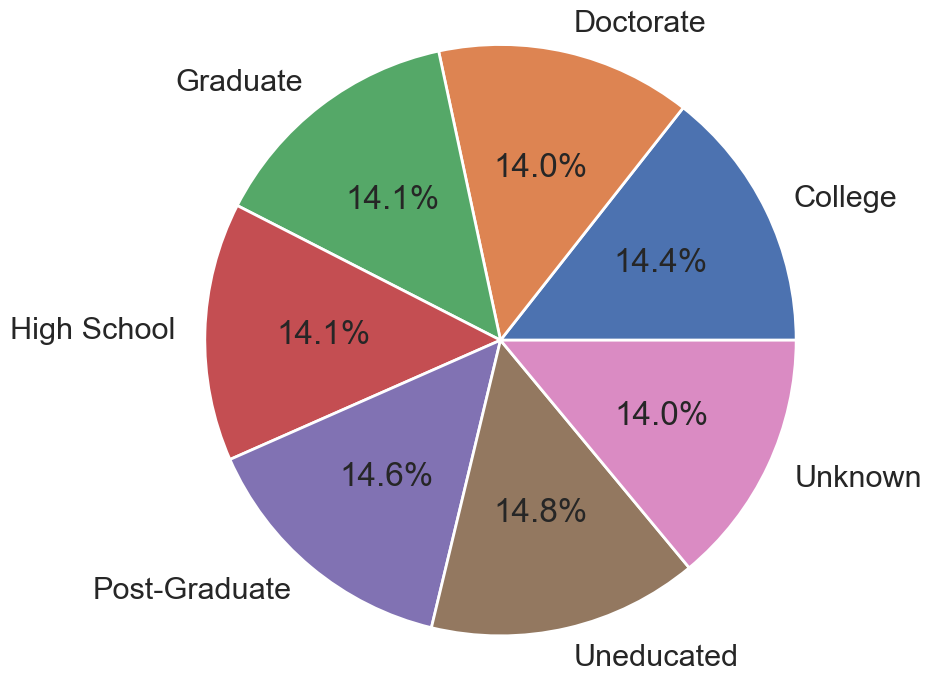

In [44]:
plt.pie(df_educational['avg_open_to_buy'], labels=df_educational['education_level'], autopct='%1.1f%%', radius = 2)
sns.set_context("poster")
plt.show()

# the married ones are more inactive than others

In [45]:
df2 = df_credit_card.groupby('marital_status')['months_inactive_12_mon'].sum().reset_index()

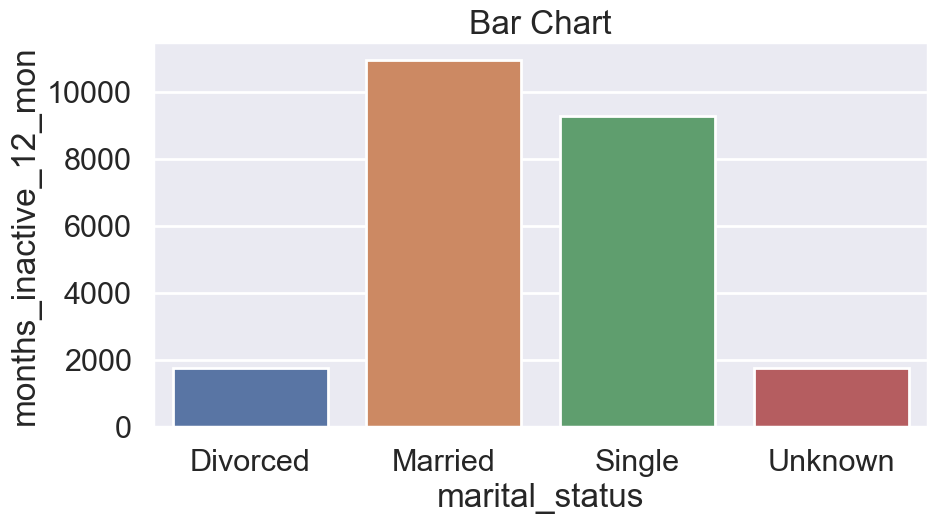

In [46]:
# Create the figure with a larger size
plt.figure(figsize=(10,5))

# Create the bar chart
sns.barplot(x='marital_status' ,y='months_inactive_12_mon', data=df2) #barwidth=0.5

# Add a title
plt.title("Bar Chart")

# Set the size of the plot
plt.gcf().set_size_inches(10,5)


# Show the chart
plt.show()

# violin plots and box plots for Gender and credit limit

the width of the violin represents the frequency or the number of observations of the data. 
The white dot in the middle of the violin represents the median of the data, and the thick black bar in the center represents 
the interquartile range (IQR). The thin lines extending from the center of the violin are called "kernel density estimates" 
and they show the probability density of the data at different values.



Female  violin plot is much wider than the other, it indicates that there are more observations in that group. 
Female violin plot is much more peaked than the male , it suggests that the data in that group is more tightly distributed around a central value.

unlike box plots, violin plots can also show the presence of outliers and skewness. 
Outliers appear as small points or lines beyond the whiskers, and skewness can be seen by the asymmetry of the violin shape.
There are no outliers.

In general, violin plots are useful for visualizing the distribution and density of data, 
especially when comparing it between different categorical variables

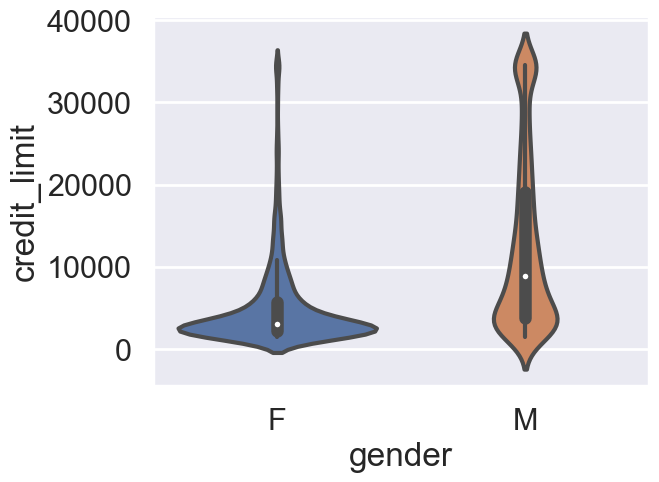

In [47]:
sns.violinplot(data=df_credit_card, x="gender", y="credit_limit")
None

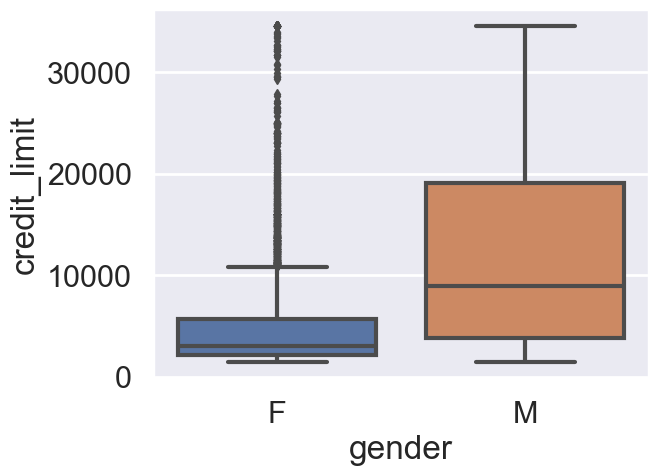

In [48]:
sns.boxplot(data=df_credit_card, x='gender', y='credit_limit')
None

#The box plot shape will show if a statistical data set is normally distributed or skewed.

#The whiskers are the two lines outside the box, that go from the minimum to the lower quartile (the start of the box) and 
#then from the upper quartile (the end of the box) to the maximum.

#Skewed data is data that creates an asymmetrical, skewed curve on a graph. In statistics, the graph of a data set with 
#normal distribution is symmetrical and shaped like a bell. However, skewed data has a "tail" on either side of the graph.


#When the median is closer to the bottom of the box, and if the whisker is shorter on the lower end of the box, 
#then the distribution is positively skewed (skewed right). 

When the median is closer to the bottom of the box, and if the whisker is shorter on the lower end of the box, 
then the distribution is positively skewed (skewed right),most data falls to the right, or positive side, and the mean is also to the right of the peak.
Outliers are defined as data points that are located outside the whiskers of the box plot. There are outliers in the F box.

In [49]:
correlation = df_credit_card['credit_limit'].corr(df_credit_card['dependent_count'])
correlation

#In Pandas, you can use the .corr() method to calculate the correlation coefficient between two variables. 
#This method returns a float value between -1 and 1, which indicates the strength of the correlation between the two variables. 
#A value of 1 indicates a strong positive correlation, a value of -1 indicates a strong negative correlation, 
#and a value of 0 indicates no correlation at all.


#0.06806460020346998 correlation means that there is no strong dependence between credit_limit and dependent_count.

0.06806460020346998

In [50]:
correl_df_credit_card = df_credit_card.corr()
correl_df_credit_card

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2,percentage
customer_age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114,0.018189,-0.018189,0.001618
dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135,0.019189,-0.019189,0.020425
months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541,0.013693,-0.013694,-0.001400
total_relationship_count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663,-0.149981,0.149981,-0.070284
months_inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503,0.153452,-0.153452,-0.010751
contacts_count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471,0.205772,-0.205772,0.000822
credit_limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965,-0.023853,0.023853,0.317136
total_revolving_bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022,-0.263033,0.263032,0.021009
avg_open_to_buy,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808,-0.000267,0.000267,0.315186
total_amt_chng_q4_q1,-0.062042,-0.035439,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235,-0.131207,0.131207,0.009466


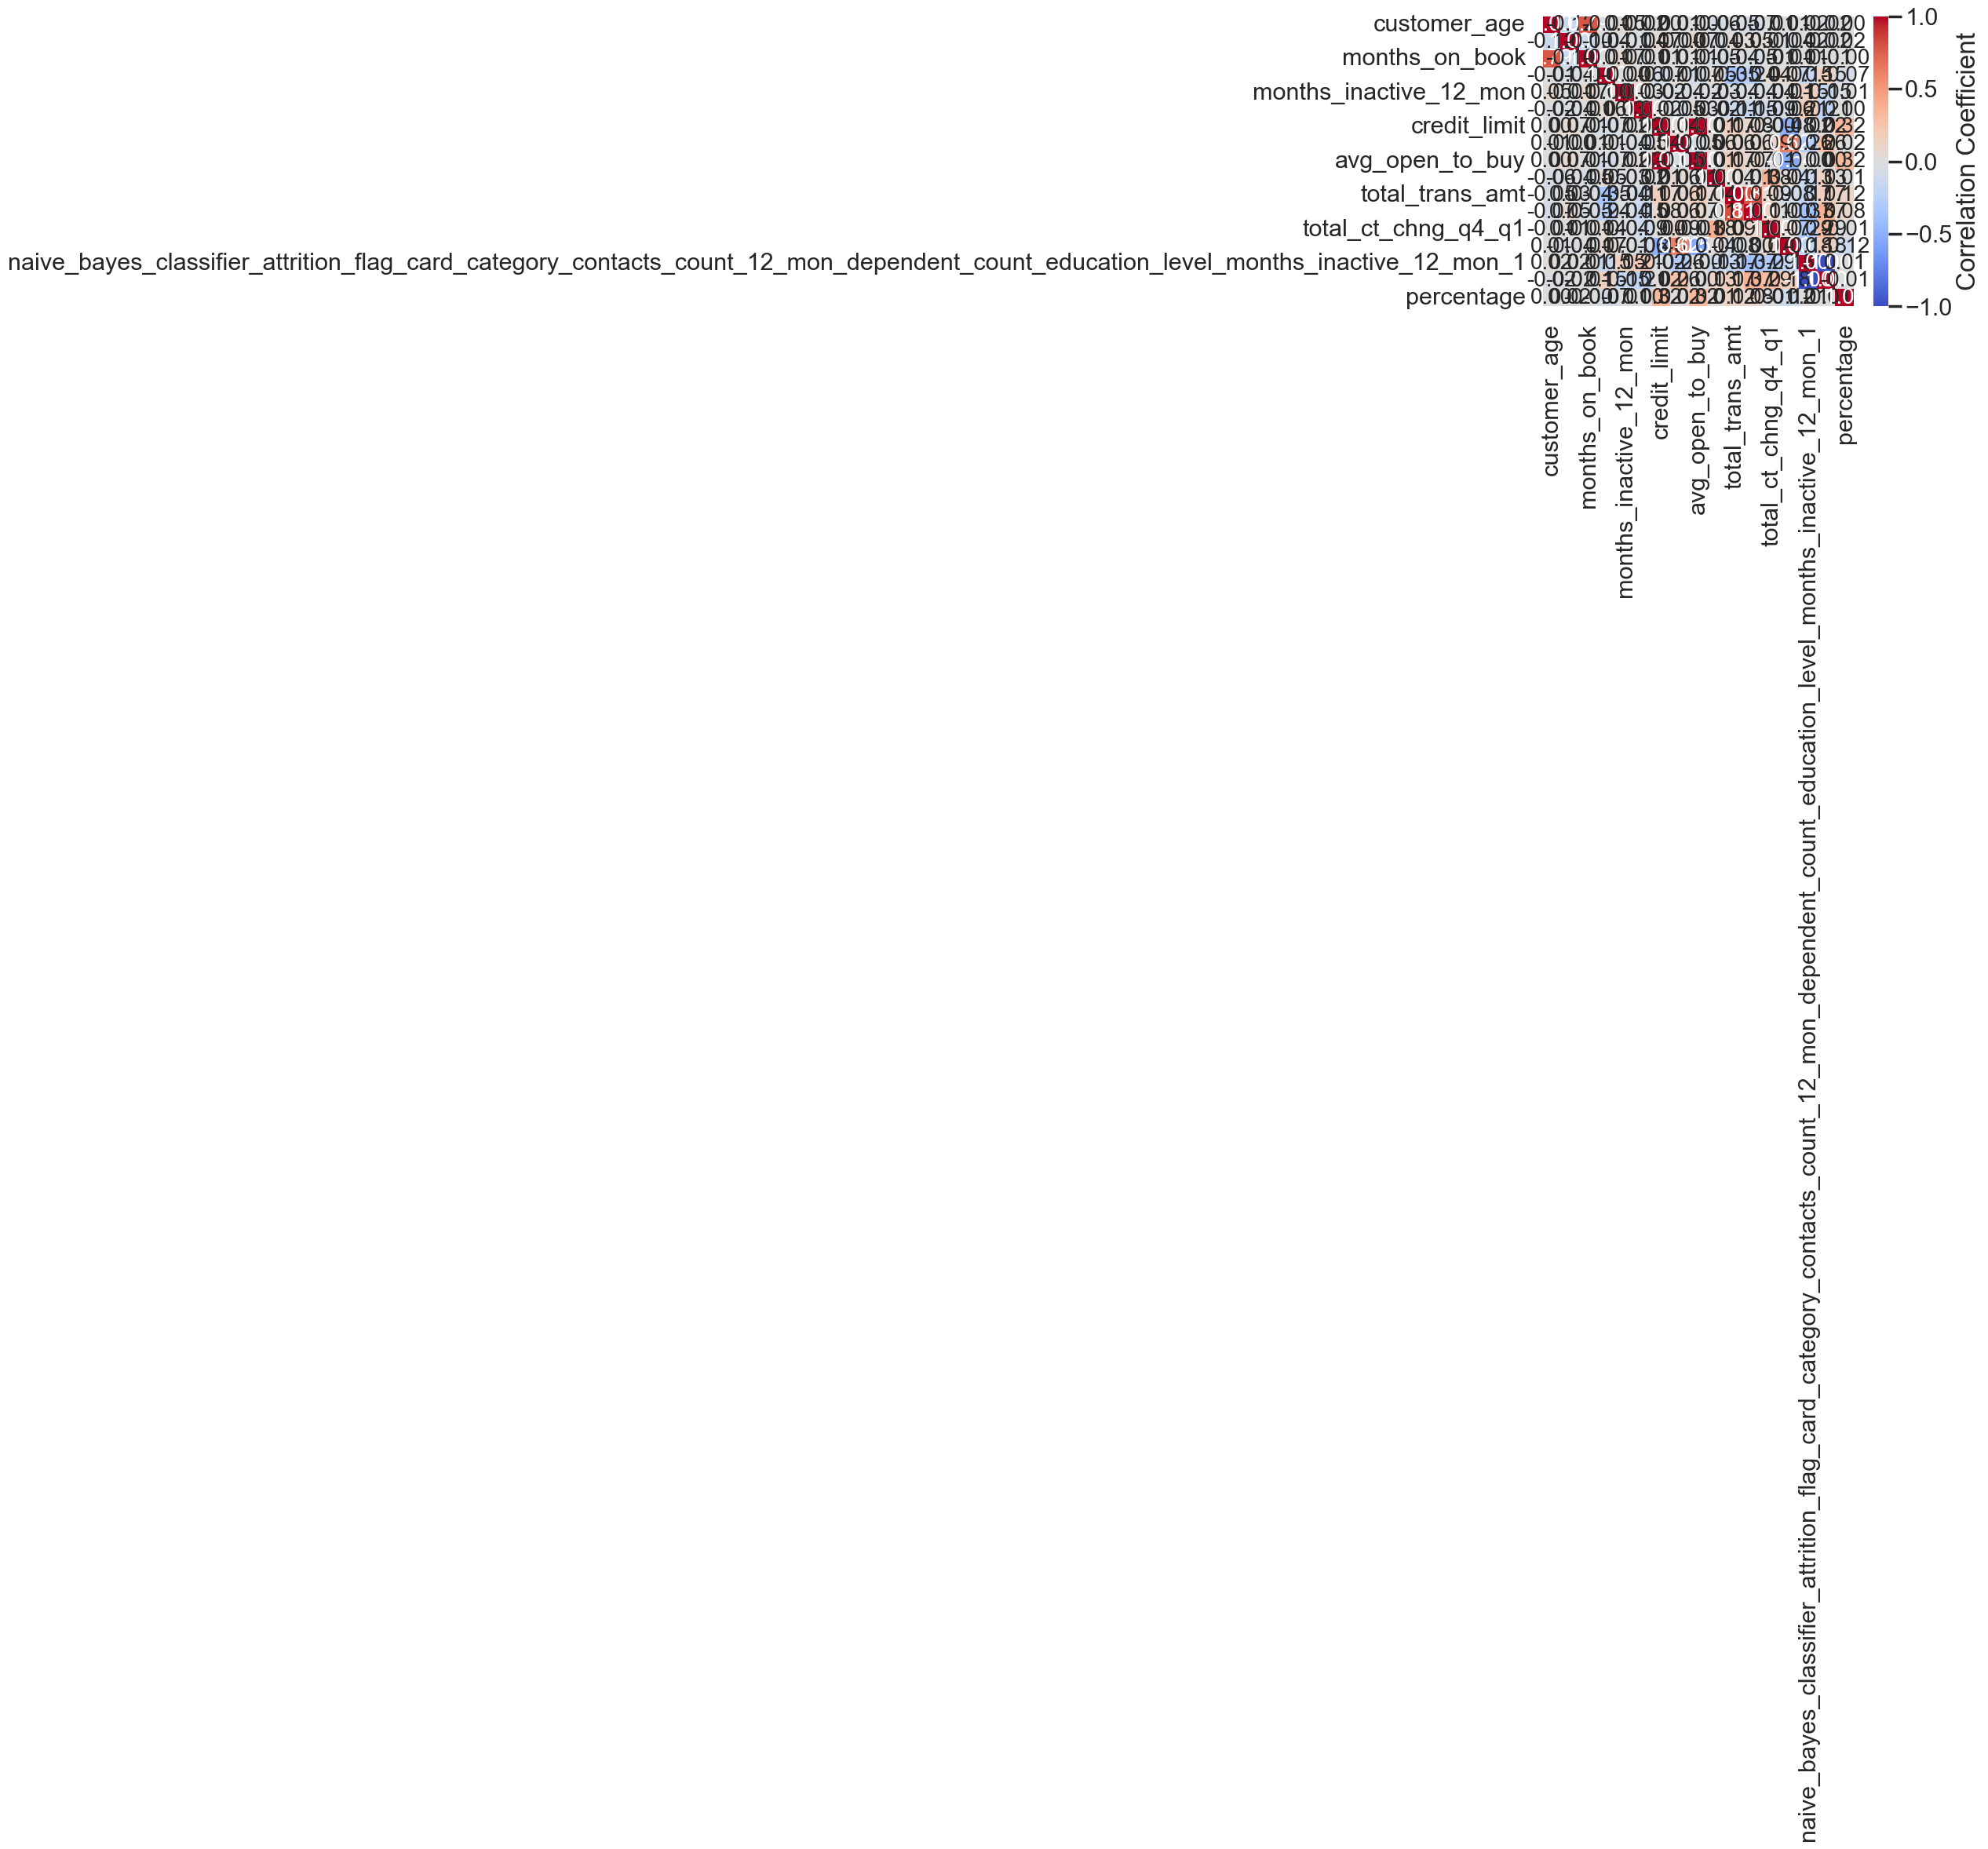

<Figure size 1800x1000 with 0 Axes>

In [51]:
# Create a heatmap of the correlation matrix
sns.heatmap(correl_df_credit_card, 
            cmap='coolwarm', 
            annot=True, 
            fmt='.2f', 
            annot_kws={'size':20},
            cbar_kws={'label': 'Correlation Coefficient'},
           )

# Adjust the size of the plot
plt.figure(figsize=(18,10))

# Show the plot
plt.show()

In [52]:
df_credit_card['credit_limit'].max()

34516.0

In [53]:
df_credit_card['credit_limit'].min()

1438.3

In [54]:
df_credit_card.columns

Index(['attrition_flag', 'age_group', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category_k', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1',
       'naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2',
       'percentage'],
      dtype='object')

In [55]:
#An inline frame (iframe) is a HTML element that loads another HTML page within the document. 
#It essentially puts another webpage within the parent page. They are commonly used for advertisements, embedded videos, 
#web analytics and interactive content.
#erargdfg


In [56]:
#if df_cut.empty:
        #print("Dataframe is empty")
#else:
        #print("Dataframe is not empty")

In [57]:
if set(['credit_limit','amount','category']).issubset(df_credit_card.columns):
        print("All columns exist")
else:
        print("columns are missing")

columns are missing


In [58]:
df_credit_card['card_category'].unique()

['Blue', 'Gold', 'Silver', 'Platinum']
Categories (4, object): ['Blue', 'Gold', 'Platinum', 'Silver']

In [59]:
df_credit_card.columns

Index(['attrition_flag', 'age_group', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category_k', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio',
       'naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1',
       'naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2',
       'percentage'],
      dtype='object')

In [61]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

In [62]:
app = JupyterDash(external_stylesheets=external_stylesheets)

In [63]:
app.layout = html.Div([
    html.H1("Credit Card Dashboard"),
    dcc.Dropdown(id='card-category-dropdown',
                 options=[{'label': i, 'value': i} for i in df_credit_card.card_category.unique()],
                 value='All'),
    dcc.RangeSlider(id='trans-amt-slider',
                    min=df_credit_card['total_trans_amt'].min(),
                    max=df_credit_card['total_trans_amt'].max(),
                    value=[df_credit_card['total_trans_amt'].min(), df_credit_card['total_trans_amt'].max()],
                    marks={str(i): str(i) for i in df_credit_card['total_trans_amt'].unique()}),
    html.Div([
        dcc.Graph(id='bar-plot')
    ], className='six columns'),
    html.Div([
        dcc.Graph(id='scatter-plot')
    ], className='six columns'),
    html.Div([
        dcc.Graph(id='pie-chart')
    ], className='six columns'),
])



@app.callback(
    Output('bar-plot', 'figure'),
    [Input('card-category-dropdown', 'value'),
     Input('trans-amt-slider', 'value')])



def update_bar_plot(card_category, trans_amt_range):
    if card_category == 'All':
        df = df_credit_card.loc[(df_credit_card['total_trans_amt'] > trans_amt_range[0]) & (df_credit_card['total_trans_amt'] < trans_amt_range[1])]
    else:
        df = df_credit_card.loc[(df_credit_card['card_category'] == card_category) & (df_credit_card['total_trans_amt'] > trans_amt_range[0]) &  (df_credit_card['total_trans_amt'] < trans_amt_range[1])]
    return{
        'data': [go.Bar(x=df['card_category'], y=df['total_trans_amt'], marker=dict(color='rgb(158,202,225)',line=dict(color='rgb(8,48,107)',width=1.5)))],
        'layout': go.Layout(title='Total Transaction Amount by Card Category',
                            xaxis={'title': 'Card Category'},
                            yaxis={'title': 'Total Transaction Amount'},
                            paper_bgcolor='rgb(248,248,255)',
                            plot_bgcolor='rgb(248,248,255)',
                            template = 'plotly_white',
                            annotations=[
                                dict(
                                    x=1,
                                    y=max(df['total_trans_amt']),
                                    xref='x',
                                    yref='y',
                                    text='Annotation Text',
                                    showarrow=True,
                                    arrowhead=7,
                                    ax=0,
                                    ay=-40
                                )
                            ])
        
    }




@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('card-category-dropdown', 'value'),
     Input('trans-amt-slider', 'value')])


def update_scatter_plot(card_category, trans_amt_range):
    if card_category == 'All':
         df = df_credit_card.loc[(df_credit_card['total_trans_amt'] > trans_amt_range[0]) & (df_credit_card['total_trans_amt'] < trans_amt_range[1])]
    else:
        df = df_credit_card.loc[(df_credit_card['card_category'] == card_category) & (df_credit_card['total_trans_amt'] > trans_amt_range[0]) &  (df_credit_card['total_trans_amt'] < trans_amt_range[1])]
    return{
        'data': [go.Scatter(x=df['credit_limit'], y=df['total_trans_amt'], mode='markers')], 
        'layout': go.Layout(title='Total Transaction Amount vs Credit Limit',
                             xaxis={'title': 'Credit Limit'},
                            yaxis={'title': 'Total Transaction Amount'})
    }



colors = ['blue', 'silver', 'gold', 'platinum']

@app.callback(
    Output('pie-chart', 'figure'),
    [Input('card-category-dropdown', 'value'),
     Input('trans-amt-slider', 'value')])



def update_pie_chart(card_category, trans_amt_range):
    if card_category == 'All':
        df = df_credit_card.loc[(df_credit_card['total_trans_amt'] > trans_amt_range[0]) & (df_credit_card['total_trans_amt'] < trans_amt_range[1])]
    else:
        df = df_credit_card.loc[(df_credit_card['card_category'] == card_category) & (df_credit_card['total_trans_amt'] > trans_amt_range[0]) & (df_credit_card['total_trans_amt'] < trans_amt_range[1])]
    return{
        'data': [go.Pie(labels=df['card_category'],
                        values=df['total_trans_amt'], hovertext=df['credit_limit'], marker=dict(colors=colors))],
        'layout': go.Layout(title='Total Transaction Amount by Card Category',
                            legend=dict(x=1, y=1),
                            template = 'plotly_dark')
    }


In [64]:
if __name__ == '__main__':
    app.run_server(debug=False, host='127.0.0.1', port=8044)

 * Running on http://127.0.0.1:8044
Press CTRL+C to quit
127.0.0.1 - - [17/Jan/2023 10:27:21] "GET /_alive_f44966a4-6375-435e-9407-7a22fc48afa3 HTTP/1.1" 200 -


Dash app running on http://127.0.0.1:8044/


3 graphs: a bar plot, scatter plot and pie chart. The bar plot shows the total transaction amount by card category, the scatter plot shows the total transaction amount vs credit limit and the pie chart shows the distribution of total transaction amount by card category.